Which genres are most popular from year to year?,
What kinds of properties are associated with movies that have high revenues?


In [223]:
import random as rand

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.drop_duplicates(inplace=True)
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [22]:
df_gen = df[df.genres.notna()]
df_gen.reset_index(drop=True, inplace=True)
df_gen.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [23]:
## Splitting Each Movie Associated with multiple Genres into multiple rows in the dataframe
adds = []
rems = []
for x in range(df_gen['genres'].size):
    if ("|" in df_gen['genres'][x]):
        genlst = df_gen['genres'][x].split("|")
        rems.append(x)
        row = df_gen.iloc[x, :].copy()
        for gen in genlst:
            tmp = row.copy()
            tmp['genres'] = gen
            adds.append(tmp.values)

#print(adds, rems)

df_gen.drop(rems, inplace=True)
adds = pd.DataFrame(adds, columns = df.columns)
df_gen = df_gen.append(adds)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [178]:
rel = df_gen.groupby(['release_year', 'genres']).median()['popularity'].unstack()
rel.fillna(0, inplace = True)
rel.max(axis=1)
popyear = rel.idxmax(axis=1)
mostpop = pd.DataFrame(popyear.values, index = popyear.index)
mostpop

,0
release_year,
1960,Romance
1961,Animation
1962,Adventure
1963,Animation
1964,Family
1965,Music
1966,Fantasy
1967,Animation
1968,Mystery


Text(0.5, 1.0, '%dominance of popularity of each genre in the years 1960-2015')

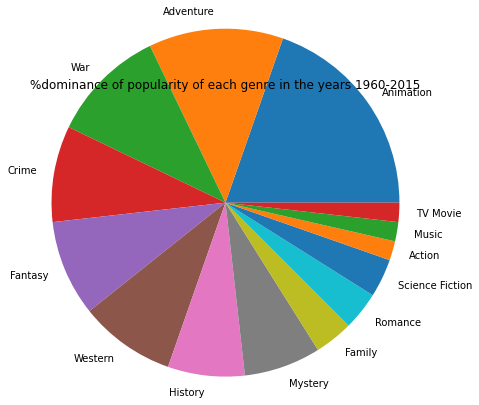

In [241]:

lbls = [x[0] for x in mostpop.value_counts().index.values]
plt.pie(mostpop.value_counts(), labels = lbls, radius=2);
plt.title('%dominance of popularity of each genre in the years 1960-2015')

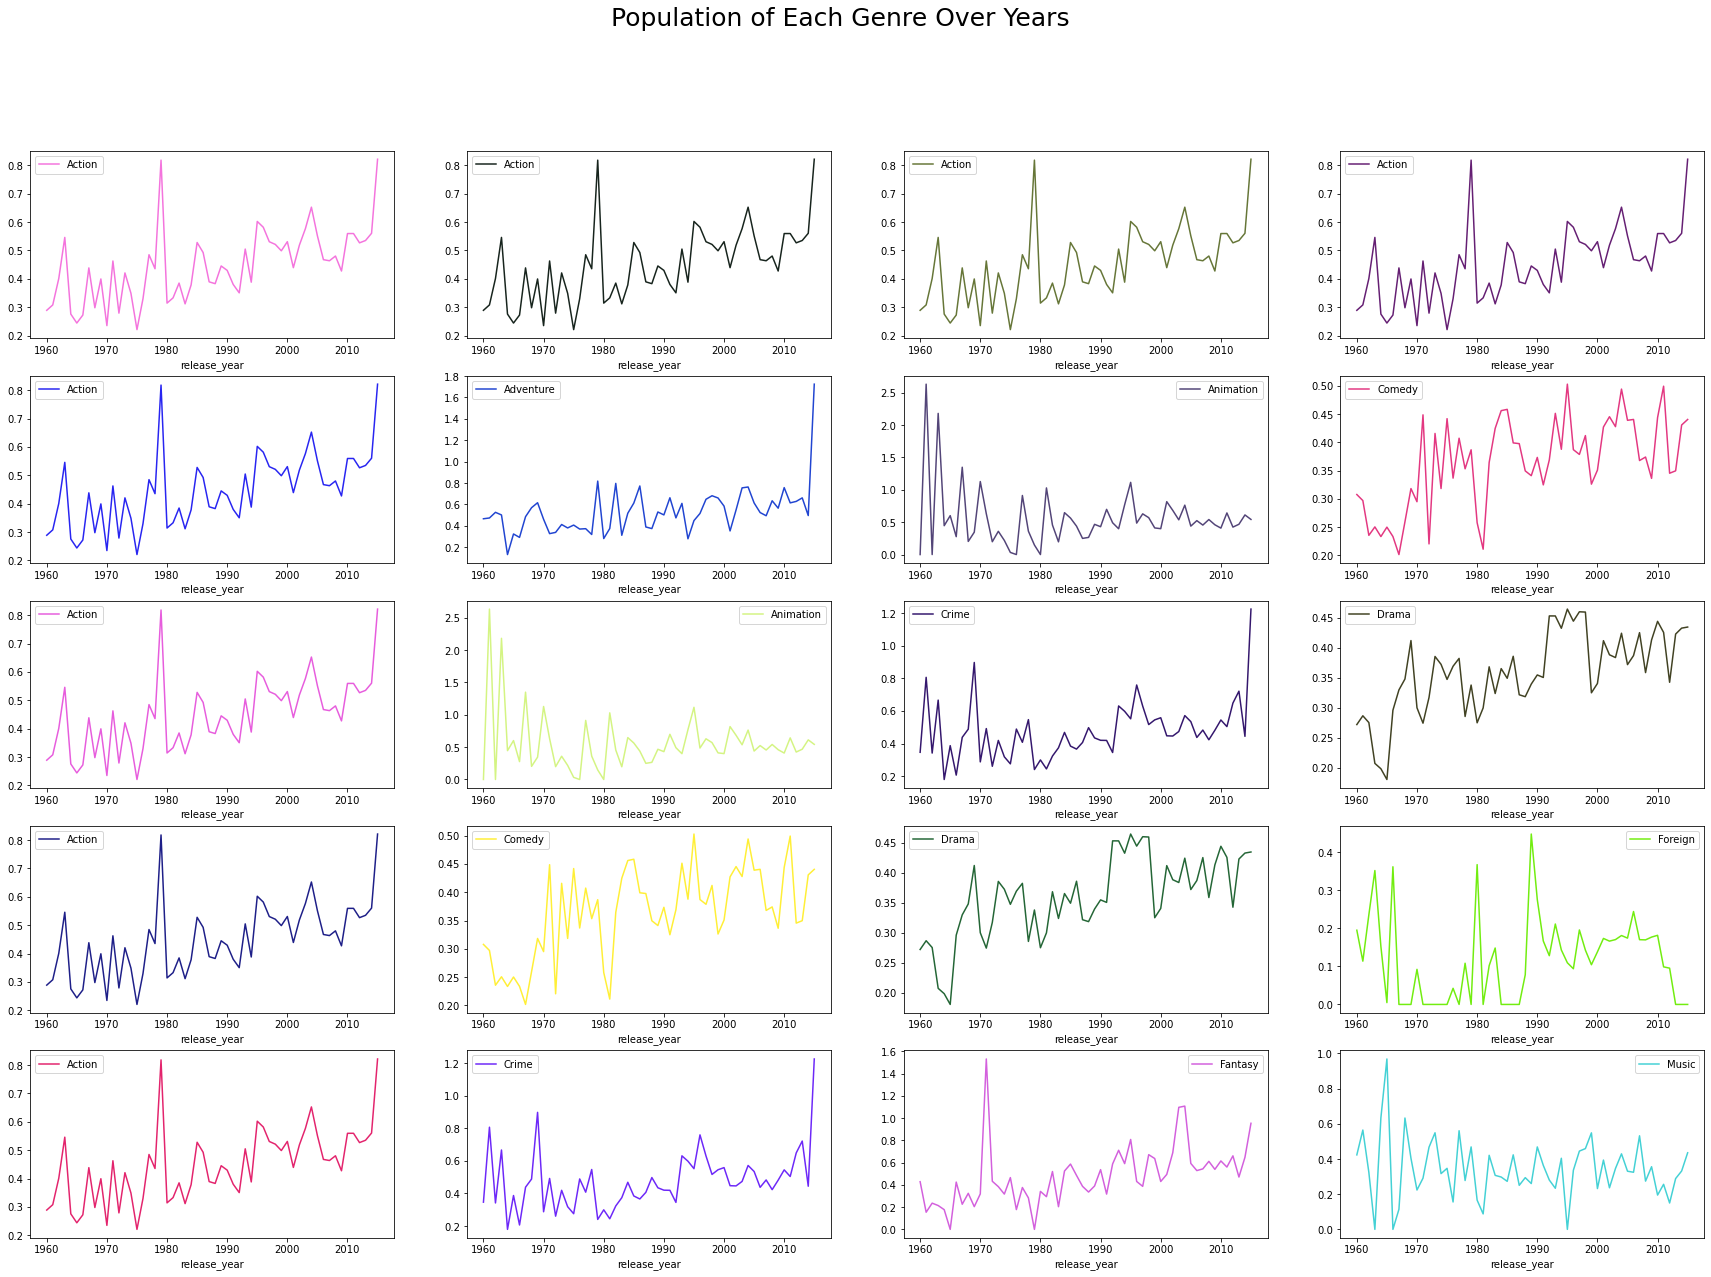

In [245]:
fig, ax = plt.subplots(5,4,figsize = (30,20))
fig.suptitle('Population of Each Genre Over Years',fontsize = 25)
for x in range(5):
    for y in range(4):
        rel.iloc[:,x*y].plot(legend=True, ax=ax[x][y], color = "#"+''.join(rand.choice('012345678DEF') for j in range(6))

);
